In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from lsst.sims.movingObjects import Orbits

In [2]:
filename = 'Chesley_Eggl_Impactors_2019_80k.csv'
d = pd.read_csv(filename)

In [3]:
d[0:5]

,ObjID,q_au,e,i_deg,argperi_deg,node_deg,tp_mjd,epoch_mjd,H_mag,a_au,M_deg
0,I00000,0.934617,0.389533,7.566861,38.666273,179.348555,66264.304701,66202.912206,24.931599,1.530986,328.057980
1,I00001,0.912532,0.384117,2.159723,42.129079,100.193352,61804.806977,61741.401769,24.999607,1.481663,325.349871
2,I00002,0.867649,0.092986,15.634939,225.735858,251.685825,63241.744209,62989.868583,24.966775,0.956599,94.664654
3,I00003,0.980302,0.645404,34.234449,338.816267,347.502607,64564.318087,64550.877583,24.998411,2.764561,357.118091
4,I00004,0.259628,0.605190,4.754471,167.177311,290.289785,60944.222203,60838.795826,24.955863,0.657601,165.145815


In [4]:
d.columns = ['objId', 'q', 'e', 'inc', 'argPeri', 'Omega', 'tPeri', 'epoch', 'H', 'a', 'meanAnomaly']

In [5]:
o = Orbits()
o.setOrbits(d)

In [6]:
o.orbits[0:5]

,objId,q,e,inc,argPeri,Omega,tPeri,epoch,H,a,meanAnomaly,g,sed_filename
0,I00000,0.934617,0.389533,7.566861,38.666273,179.348555,66264.304701,66202.912206,24.931599,1.530986,328.057980,0.15,S.dat
1,I00001,0.912532,0.384117,2.159723,42.129079,100.193352,61804.806977,61741.401769,24.999607,1.481663,325.349871,0.15,S.dat
2,I00002,0.867649,0.092986,15.634939,225.735858,251.685825,63241.744209,62989.868583,24.966775,0.956599,94.664654,0.15,S.dat
3,I00003,0.980302,0.645404,34.234449,338.816267,347.502607,64564.318087,64550.877583,24.998411,2.764561,357.118091,0.15,S.dat
4,I00004,0.259628,0.605190,4.754471,167.177311,290.289785,60944.222203,60838.795826,24.955863,0.657601,165.145815,0.15,S.dat


In [7]:
len(o)

80000

In [8]:
nobjs = 10000
idxs = np.arange(0, len(o), 1)
subset_idxs = np.random.choice(idxs, size=nobjs, replace=False)
subset = o.orbits.iloc[subset_idxs]

In [13]:
# When running as repeat
subset = Orbits()
subset.readOrbits('impactors_10k.txt')
subset = subset.orbits

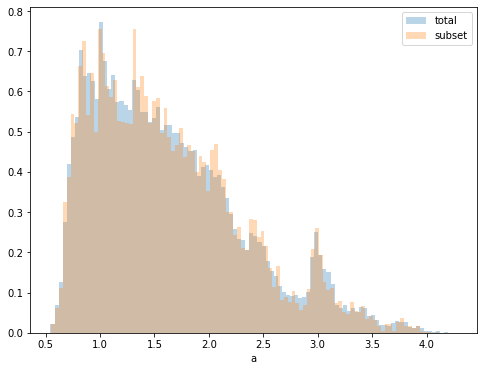

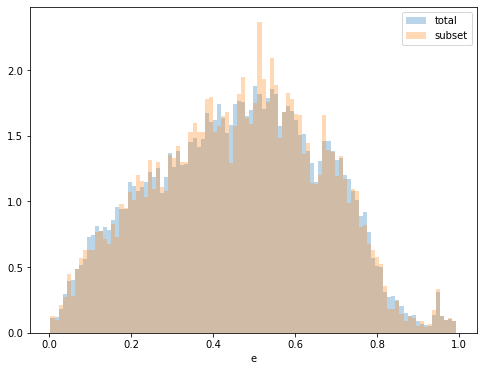

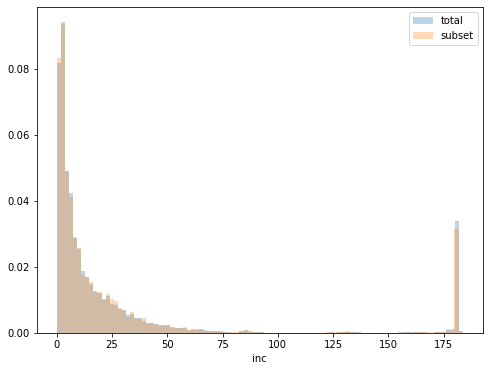

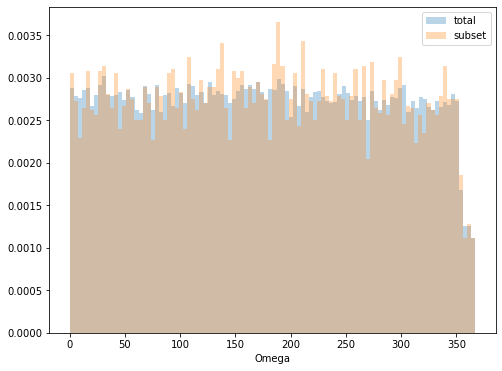

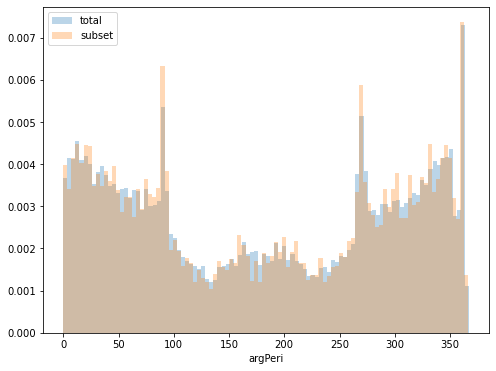

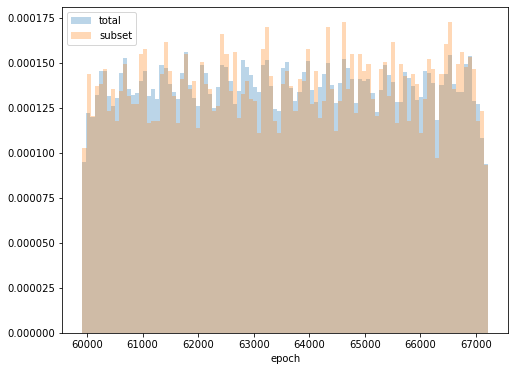

In [14]:
for key in ('a', 'e', 'inc', 'Omega', 'argPeri', 'epoch'):
    plt.figure(figsize=(8,6))
    n,b,p = plt.hist(o.orbits[key], bins=100, label='total', density=True, alpha=0.3)
    n,b,p = plt.hist(subset[key], bins=100, label='subset', density=True, alpha=0.3)
    plt.xlabel(f'{key}')
    plt.legend()

In [15]:
# write subset
fname = f'impactors_{nobjs//1000}k'
print(fname)

impactors_10k


In [19]:
subset.to_csv(fname + '.txt', sep=' ', index=False)
# make splits
try:
    os.mkdir('split')
except FileExistsError:
    pass
x = np.arange(0, nobjs+1, nobjs//10)
for i, (xi, xo) in enumerate(zip(x[:-1], x[1:])):
    subset[xi:xo].to_csv(f'split/{fname}_{i}.txt', index=False, sep=' ')

In [20]:
# Make joint file which skips the _3 split, which failed on some runs
impactors_minus_split3 = []
x = np.arange(0, nobjs+1, nobjs//10)
for i, (xi, xo) in enumerate(zip(x[:-1], x[1:])):
    if i == 3:
        pass
    else:
        impactors_minus_split3.append(subset[xi:xo])

impactors_minus_split3 = pd.concat(impactors_minus_split3)
impactors_minus_split3.to_csv('impactors_minus3.txt', index=False, sep=' ')
impactors_minus_split3

,objId,q,e,inc,argPeri,Omega,tPeri,epoch,H,a,meanAnomaly,g,sed_filename
0,I06179,0.476344,0.352415,12.886503,184.500960,36.543329,65482.001439,65331.145753,24.977282,0.735570,124.316049,0.15,S.dat
1,I28865,0.640413,0.227452,3.324292,154.161332,55.679421,62931.249063,62793.370696,24.898385,0.828962,179.947869,0.15,S.dat
2,I40962,0.382677,0.439787,23.064164,179.908165,93.002772,67346.277024,67213.271854,24.917805,0.683093,127.804790,0.15,S.dat
3,I26771,1.016182,0.487200,1.920880,2.667845,274.635569,66333.490121,66301.350232,24.927855,1.981633,348.644312,0.15,S.dat
4,I32895,0.978377,0.124954,15.740634,318.783442,215.341777,66662.447008,66239.517354,24.920052,1.118086,7.418369,0.15,S.dat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,I01837,0.597774,0.425799,19.749850,249.826985,190.544166,66932.495961,66579.475872,24.994588,1.041054,32.438000,0.15,S.dat
9996,I17659,0.978721,0.406453,4.586383,18.938575,31.898913,62085.043975,62039.164462,24.984767,1.648936,338.644140,0.15,S.dat
9997,I48129,0.932438,0.733188,179.995920,343.974423,90.401819,64749.619881,64698.492982,24.950944,3.494744,352.286873,0.15,C.dat
9998,I49603,0.957733,0.406775,15.802647,333.271468,148.979691,59971.354468,59963.238517,24.931076,1.614451,356.100525,0.15,S.dat


In [20]:
!ls *

Chesley-Eggl-Impactors.ipynb            README.md
Chesley_Eggl_Impactors_2019_80k.csv     impactors_10k.txt
Chesley_Eggl_Impactors_2019_80k.csv.zip impactors_30k.txt

split:
impactors_30k_0.txt impactors_30k_3.txt impactors_30k_6.txt impactors_30k_9.txt
impactors_30k_1.txt impactors_30k_4.txt impactors_30k_7.txt
impactors_30k_2.txt impactors_30k_5.txt impactors_30k_8.txt
